# Visualization : Cam EigenCam GradCam

In [1]:
from cams.vCam import CAM
from cams.eigenCam import EigenCAM
from cams.gradCam import GradCAM
from utils.image import get_img_list_raf, img_to_input_tensor ,pp_images

## Parameters

In [2]:
MODEL_NAME = 'FERplus-impr-std_0124-1040_weights.h5'
LAST_CONV_NAME = 'block3_conv3'
IMG_SHAPE = (100,100,3)

emotion = 'Anger'
num_imgs = 10

## Input Images

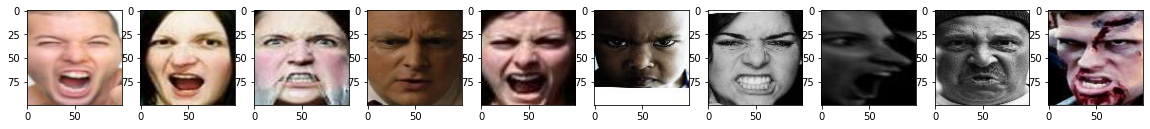

In [3]:
img_list = get_img_list_raf(emotion, num_imgs)
img_tensors = img_to_input_tensor(img_list, IMG_SHAPE)
pp_images(img_tensors)

## CAM

In [4]:
vis_CAM = CAM(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)
img_tensors_not_rgb = img_to_input_tensor(img_list, IMG_SHAPE, RGB=False)
heatmap_CAM, pred_CAM = vis_CAM.get_CAM(img_tensors_not_rgb)

2022-01-27 07:26:43.236479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 07:26:43.236583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-01-27 07:26:43.423892: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1


2022-01-27 07:26:43.470655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## GradCam

In [5]:
vis_GradCam = GradCAM(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)
heatmap_GradCam, pred_GradCam = vis_GradCam.get_CAM(img_tensors)

2022-01-27 07:26:43.711064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## EigenCam

In [6]:
vis_EigenCam = EigenCAM(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)
heatmap_EigenCam, pred_EigenCam = vis_EigenCam.get_CAM(img_tensors)

2022-01-27 07:26:44.399784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-27 07:26:44.636091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Result

### Cam

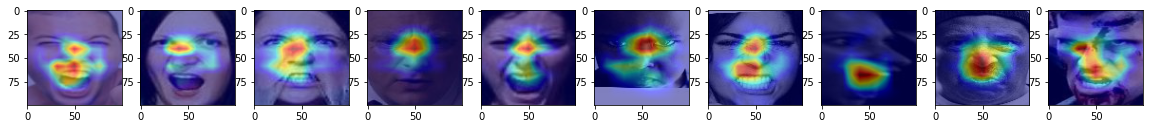

In [7]:
pp_images(img_tensors, heatmap_CAM)

### EigenCam

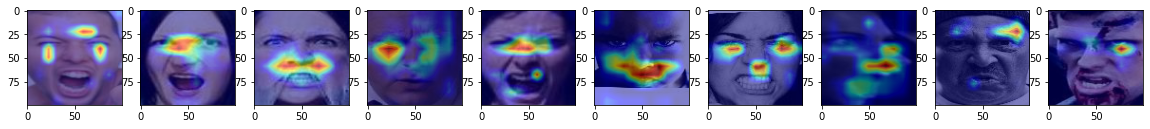

In [8]:
pp_images(img_tensors, heatmap_EigenCam)

### GradCam

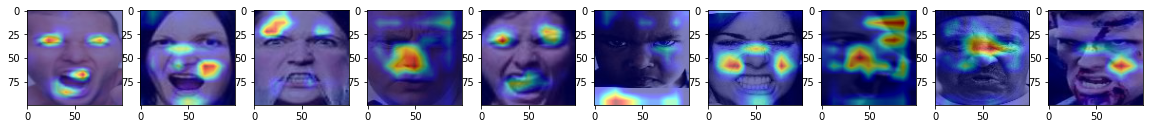

In [9]:
pp_images(img_tensors, heatmap_GradCam)